# Predicting Prospective Properties for Surprise Housing

## 1. Data Understanding and Exploration

In [458]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [459]:
# reading the dataset
raw_data = pd.read_csv("C:/Users/agantait/Downloads/Housing_Assignment_Regression/train.csv")

In [460]:
pd.set_option('display.max_columns', None)
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00000000000000000000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00000000000000000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00000000000000000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00000000000000000000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.00000000000000000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00000000000000000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00000000000000000000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00000000000000000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00000000000000000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00000000000000000000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.00000000000000000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00000000000000000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00000000000000000000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00000000000000000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00000000000000000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [461]:
# taking numerical features
raw_data_numeric = raw_data.select_dtypes(include=['float64', 'int64'])
raw_data_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.00000000000000000000,8450,7,5,2003,2003,196.00000000000000000000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.00000000000000000000,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.00000000000000000000,9600,6,8,1976,1976,0.00000000000000000000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.00000000000000000000,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.00000000000000000000,11250,7,5,2001,2002,162.00000000000000000000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.00000000000000000000,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.00000000000000000000,9550,7,5,1915,1970,0.00000000000000000000,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.00000000000000000000,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.00000000000000000000,14260,8,5,2000,2000,350.00000000000000000000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.00000000000000000000,3,836,192,84,0,0,0,0,0,12,2008,250000


In [462]:
raw_data_numeric.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00000000000000000000,1460.00000000000000000000,1201.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1452.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1379.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000
mean,730.50000000000000000000,56.89726027397260565976,70.04995836802665110099,10516.82808219178150466178,6.09931506849315052676,5.57534246575342429253,1971.26780821917805042176,1984.86575342465744142828,103.68526170798898533576,443.63972602739727335575,46.54931506849315070440,567.24041095890413544112,1057.42945205479441028729,1162.62671232876709837001,346.99246575342465348513,5.84452054794520581282,1515.46369863013705980848,0.42534246575342465890,0.05753424657534246534,1.56506849315068485851,0.38287671232876713256,2.86643835616438336089,1.04657534246575334436,6.51780821917808239618,0.61301369863013699391,1978.50616388687444668903,1.76712328767123283413,472.98013698630137469081,94.24452054794519995085,46.66027397260273801294,21.95410958904109577361,3.40958904109589022724,15.06095890410958837435,2.75890410958904119809,43.48904109589041411255,6.32191780821917781452,2007.81575342465748690302,180921.19589041094877757132
std,421.61000936884789780379,42.30057099381034646512,24.28475177448318333973,9981.26493237914655765053,1.38299654674159233636,1.11279933671273667528,30.20290404252526528239,20.64540680770939573563,181.06620658721817562764,456.09809084092455577775,161.31927280654056744424,441.86695529243422697618,438.70532445947048927337,386.58773804107380556161,436.52843588625910342671,48.62308143351912548269,525.48038342320273841324,0.51891060608979922009,0.23875264627920764204,0.55091580129543182842,0.50288538109289726563,0.81577804414422117052,0.22033819838402976532,1.62539329058406400996,0.64466638631223438516,24.68972476859021369933,0.74731501011111156618,213.80484145338076018561,125.33879435172359251283,66.25602767664973669071,61.11914860172878860567,29.31733055678220267737,55.75741528187448636800,40.17730694453042872283,496.12302445793108063299,2.70362620835951972253,1.32809512055210410253,79442.50288288663432467729
min,1.00000000000000000000,20.00000000000000000000,21.00000000000000000000,1300.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1872.00000000000000000000,1950.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,334.00000000000000000000,0.00000000000000000000,0.00000000000000000000,334.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,2.00000000000000000000,0.00000000000000000000,1900.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000

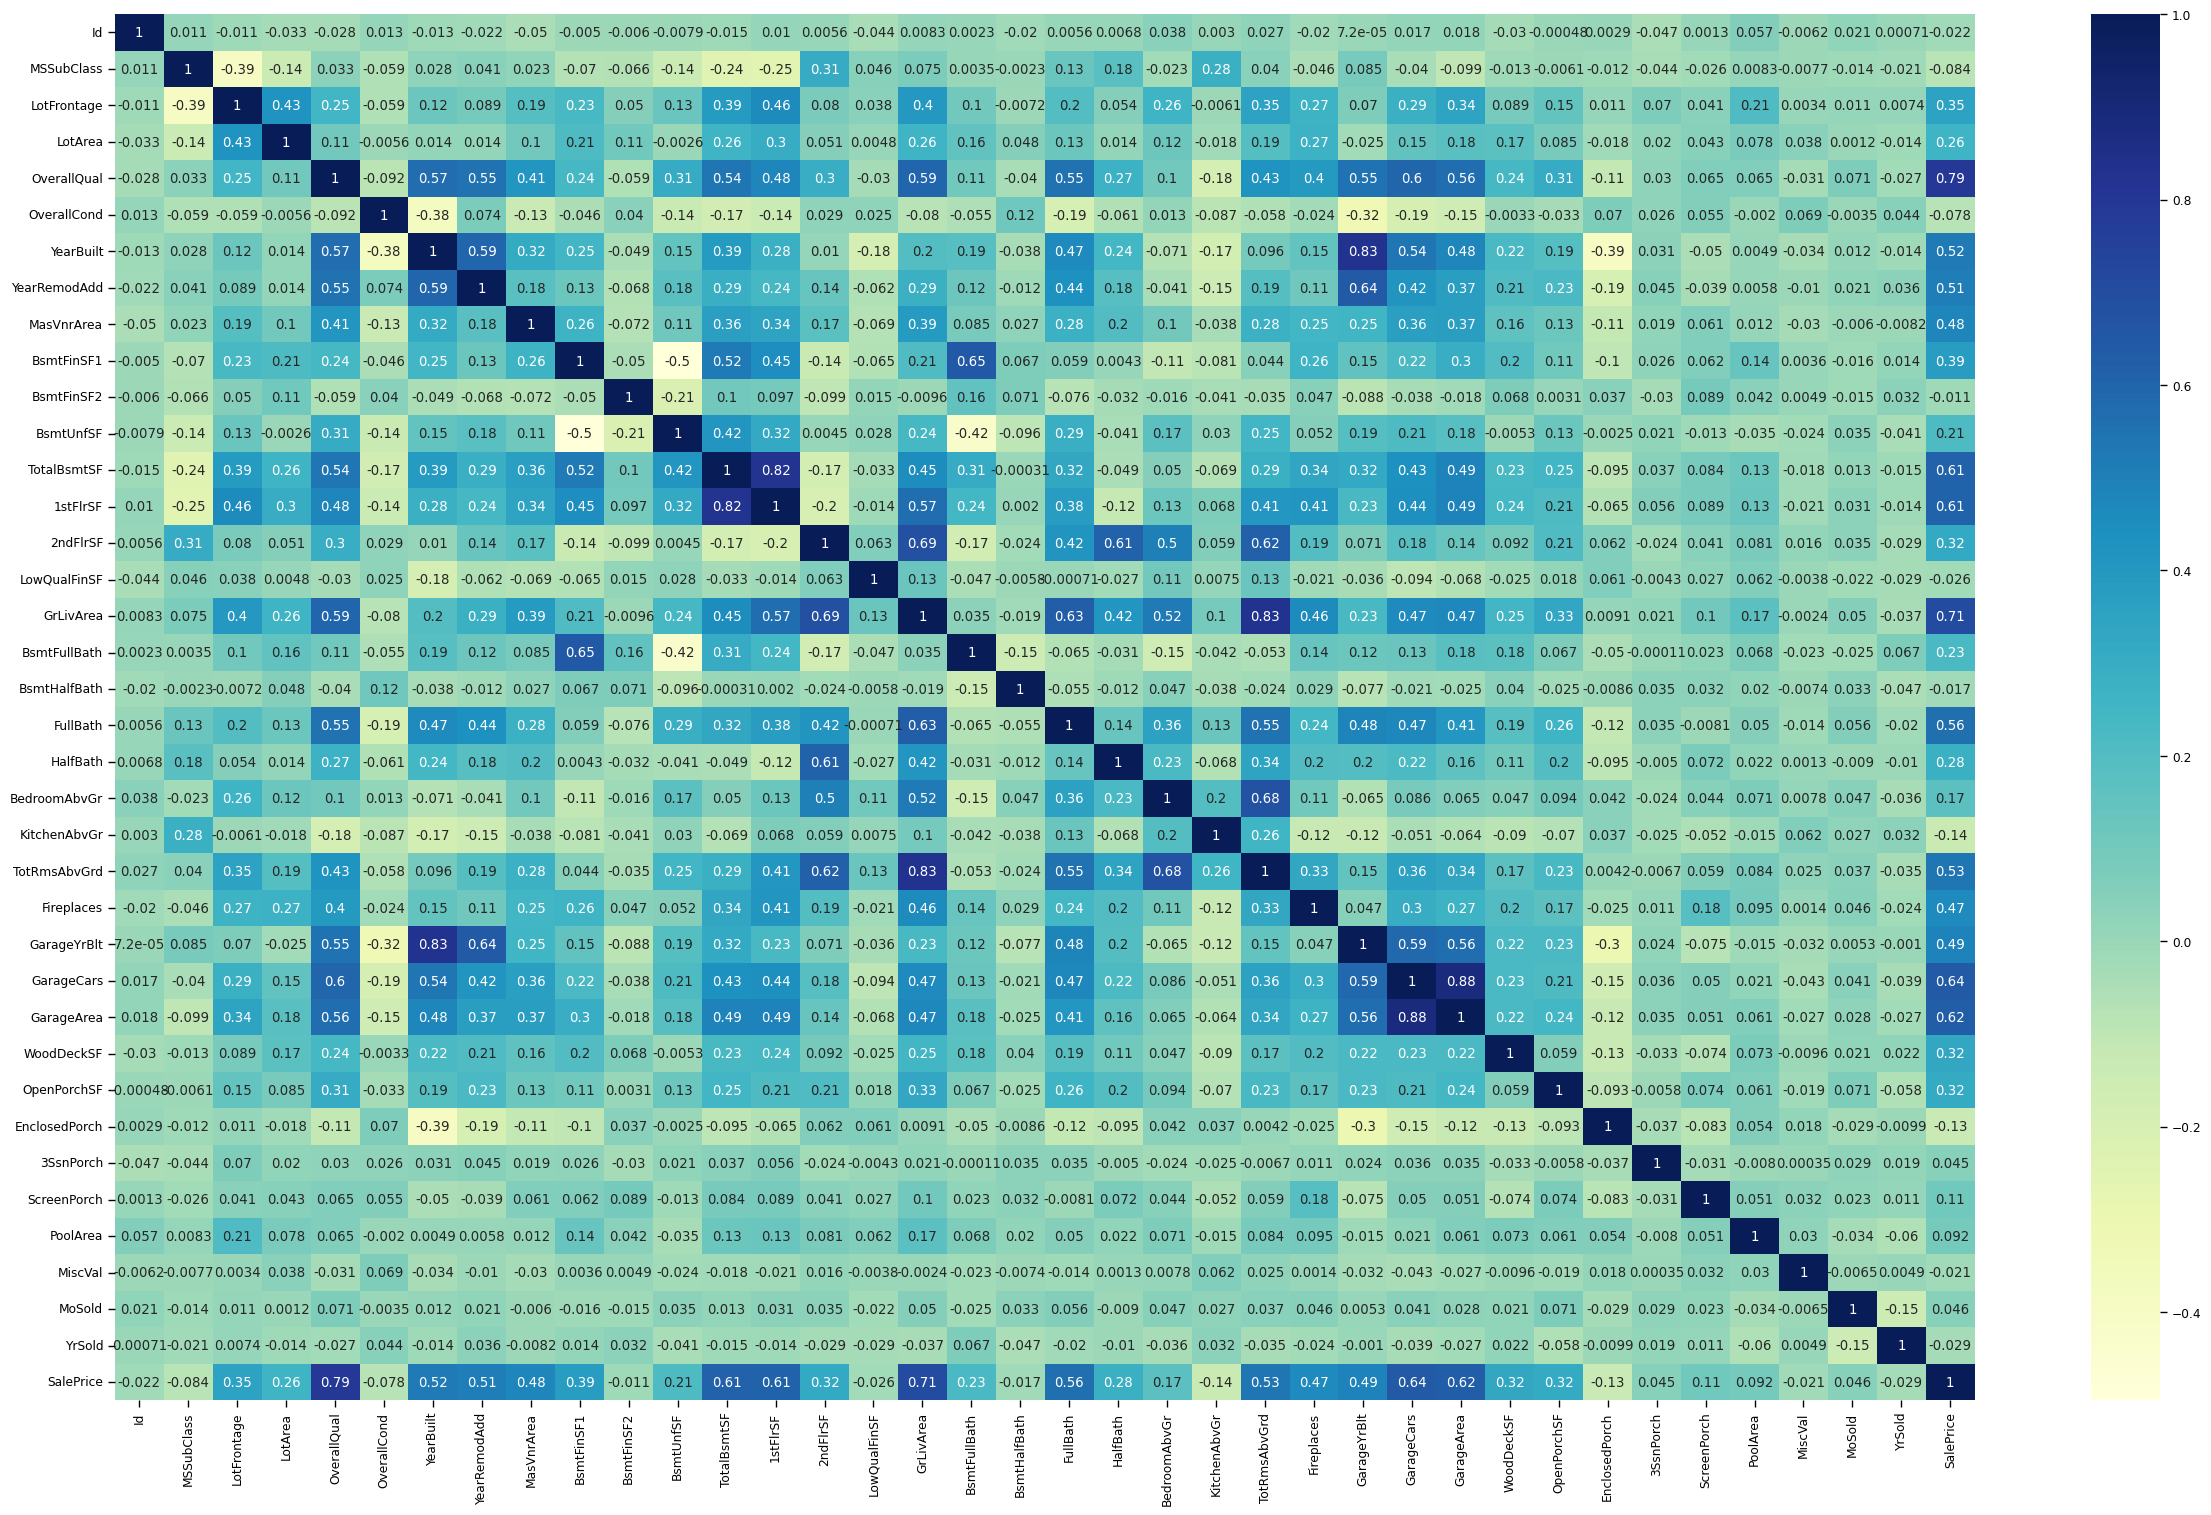

In [463]:
# correlation matrix
cor = raw_data_numeric.corr()
cor

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

SalePrice is highly Correlated (positive) to :
1. OverallQual: Rates the overall material and finish of the house .79
2. GrLivArea: Above grade (ground) living area square feet .71
3. GarageCars: Size of garage in car capacity .64
4. TotalBsmtSF: Total square feet of basement area .61
5. GarageArea: Size of garage in square feet .62
6. 1stFlrSF: First Floor square feet .61

Some independent variables are also highly Correlated
1. GarageCars: Size of garage in car capacity + GarageArea: Size of garage in square feet
2. GarageYrBlt: Year garage was built  +  YearBuilt: Original construction date .83
3. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) + GrLivArea: Above grade (ground) living area square feet .83
4. 1stFlrSF: First Floor square feet + TotalBsmtSF: Total square feet of basement area .82


In [464]:
#taking categorical data
raw_data_categorical = raw_data.select_dtypes(include=['object'])
raw_data_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [465]:
raw_data_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## 2. Data Cleaning and Preparation

In [466]:
# converting to log to reduce the spread of data points.
raw_data_ref = raw_data
raw_data_ref['SalePrice'] = np.log1p(raw_data_ref['SalePrice'])

In [467]:
# converting to log skew features
lst_n = raw_data_ref.dtypes[raw_data_ref.dtypes != "object"].index
sks = raw_data_ref[lst_n].apply(lambda x: x.skew()).sort_values(ascending=False)
for i in sks.index:
    raw_data_ref[i] = np.log1p(raw_data_ref[i])

In [468]:
raw_data_ref.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00000000000000000000,1460.00000000000000000000,1201.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1452.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1379.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000,1460.00000000000000000000
mean,6.29430744612699211160,3.81879380011715241494,4.20710894171410210163,9.11096632393916117110,1.94030861371203378063,1.86926573158716191614,7.58682138679032469497,7.59375604934870196416,2.13194576240713695725,4.22973095300872792279,0.65539804255199074490,5.64837772857255959735,6.75055987294158565959,7.00845249432315853255,2.86458595670131721533,0.09981397635364103182,7.26851176058558134940,0.29139453483588312332,0.03948561576858344857,0.91782713628632139891,0.26302540346821101647,1.32794318118804688389,0.71167346768843209315,1.99440675595324878877,0.39987503586739486794,7.59052451811366335477,0.97259883863973473073,5.80815584544629004426,2.45720648132117469586,2.30854083307069046782,0.69801869671220984070,0.08567852983026086333,0.41067148536625508459,0.03043103638716642551,0.23345593580624587893,1.91082768465610652875,7.60530043162943947266,2.56632853121513493377
std,0.97556556680500028378,0.68835352836825369760,0.34622833093332916476,0.51736901298607229638,0.20198272156683538814,0.16840029011439636153,0.01538929275065562333,0.01042406918609123032,2.63126457916958012007,2.99205232448561009306,1.84504465245245863336,1.85402027931013502204,1.14571246240060720112,0.31743113076983664467,3.29331145616570264423,0.74735362086327650211,0.33330300926507583359,0.34983858732777989298,0.16259932970988513756,0.22328064680065592973,0.34186873073102763687,0.22990747051938834056,0.08926775460278836560,0.21424554971525258673,0.39465985139661330372,0.01252509036730845883,0.32226891029725290849,1.45511833820083169577,2.59643457281767631173,2.15238733815400040683,1.72731692449588880578,0.66687624428742386939,1.40319368042431791288,0.43868469954361966057,1.22602961351393147105,0.42553986269806565179,0.00066111255839561116,0.03066004289645486020
min,0.69314718055994528623,3.04452243772342301398,3.09104245335831606667,7.17088847851250488219,0.69314718055994528623,0.69314718055994528623,7.53529670244408844582,7.57609734062311090952,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,5.81413053182506622818,0.00000000000000000000,0.00000000000000000000,5.81413053182506622818,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.09861228866810978211,0.00000000000000000000,7.55013534248842876906,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.69314718055994528623,7.604396348

In [469]:
# convert into dummies
raw_data_ref = pd.get_dummies(raw_data_ref) #, drop_first=True
raw_data_ref.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQua

In [470]:
X = raw_data_ref.drop(['SalePrice'], axis=1)
y = raw_data_ref['SalePrice']

In [471]:
X.shape

(1460, 288)

In [472]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=288)

In [473]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [474]:
# performing impute operation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [475]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

## 3. Model Building and Evaluation

In [476]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [477]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

2.5661810315371474
[-6.13676041e-05 -5.97131449e-04  8.14549116e-05  4.06214759e-03
  3.33746032e-03  3.42017814e-03  4.69563759e-03  2.07793516e-03
  1.20205213e-03  3.04467030e-03  8.47215996e-04 -6.81022236e-04
  9.79328891e-03  6.30542536e-04  6.45101668e-04 -4.41240678e-04
  1.07631224e-02  8.51463236e-04 -1.72007882e-04  5.56261274e-04
  1.33101458e-04 -7.95452898e-05 -1.32028033e-03  3.55062350e-04
  8.78247712e-05 -8.64412753e-05  1.17212310e-03  5.01984262e-03
  8.13341902e-04  3.09581317e-04  4.25306758e-04  1.37729778e-04
  5.79000050e-04  1.25488869e-01 -6.47757605e-04  1.71391564e-04
 -2.70960607e-04  1.00419544e+10  2.49793662e+10  1.36443292e+10
  4.99527601e+10  4.35532088e+10  3.39507183e+10  3.39507183e+10
 -5.37994388e-04  5.80813880e-04 -1.17814829e+11 -4.31203290e+10
 -2.34906553e+10 -1.21011192e+11  5.02407324e+10  4.55118811e+10
  4.15534552e+10  7.66156153e+10  1.72297801e+10  1.72297801e+10
  3.37296272e+10  2.09094282e+10  1.46945055e+10  4.63544089e+09
  3.88

In [478]:
from sklearn.metrics import r2_score, mean_squared_error

In [479]:
y_pred_train = lm.predict(X_train_scaled)
y_pred_test = lm.predict(X_test_scaled)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9574416831677488
-1.4051620217011862e+25
0.04018956100190604
5.982909151130214e+24
3.9362939277087214e-05
1.3659609934087246e+22


In [480]:
## Ridge and Lasso Regression

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_scaled, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [481]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [482]:
#Fitting Ridge model for alpha = 50 and printing coefficients which have been penalised
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_scaled, y_train)
print(ridge.coef_)

[-1.31848335e-04 -5.51390023e-04  5.86489769e-04  3.24259618e-03
  3.39768332e-03  2.70142925e-03  2.60771905e-03  1.89773630e-03
  7.43501502e-04  1.62759270e-03  7.19538894e-05 -4.37924359e-04
  2.35597314e-03  3.99846926e-03  1.11523495e-03 -3.51629835e-04
  6.41544496e-03  1.17272852e-03  8.29038359e-05  9.94618699e-04
  5.46912715e-04  1.69697268e-04 -9.63698338e-04  1.06844752e-03
  7.04605624e-04  5.46079822e-04  1.92134065e-03  8.19089553e-04
  6.56513677e-04  3.84833043e-04  2.42595306e-04  1.49172412e-04
  4.33991622e-04 -9.02242282e-05 -1.58530353e-04  2.75847879e-04
 -2.29767917e-04 -2.46797500e-03  5.10483366e-04  1.97282833e-04
  4.66815665e-04 -3.20958701e-04 -1.84566488e-04  1.84566488e-04
 -5.03760850e-04  5.30372638e-04 -8.34880817e-05 -5.20237568e-05
  1.15609710e-04  7.73785262e-05 -2.43624420e-04  6.24438544e-07
 -1.11474100e-04  2.19845313e-04  1.39857772e-04 -1.39857772e-04
  8.92634398e-05  5.00570239e-04 -6.22051247e-04 -1.40700476e-04
 -9.49171246e-05  1.23345

In [483]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_scaled)
y_pred_test = ridge.predict(X_test_scaled)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9548611605938182
0.861687243234722
0.04262645411989664
0.05889090691244167
4.1749710205579475e-05
0.0001344541253708714


In [484]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_scaled, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [485]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [486]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_scaled, y_train) 

Lasso(alpha=0.0001)

In [487]:
lasso.coef_

array([-0.00000000e+00, -3.87966367e-05,  3.70410893e-04,  3.36127178e-03,
        3.69178630e-03,  2.94366089e-03,  4.20184348e-03,  1.97378956e-03,
        3.28078594e-04,  1.73104949e-03, -0.00000000e+00, -2.76521159e-04,
        1.70217209e-03,  2.20405286e-03, -0.00000000e+00, -4.16780941e-04,
        1.09921398e-02,  1.21205971e-03,  0.00000000e+00,  2.77016167e-04,
        0.00000000e+00, -0.00000000e+00, -1.03219647e-03,  0.00000000e+00,
        6.79813066e-04,  2.64834274e-04,  2.05184183e-03,  0.00000000e+00,
        6.22733747e-04,  9.56855581e-05,  2.43470887e-05,  5.39953455e-06,
        2.94130217e-04,  0.00000000e+00, -8.56100014e-06,  7.48532096e-05,
       -1.21207436e-04, -2.37890880e-03,  2.76464880e-06,  1.34217310e-05,
        0.00000000e+00, -5.94704724e-04, -2.94558981e-04,  5.02916894e-19,
       -3.52322083e-04,  3.71243830e-04, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  9.12073246e-05, -1.77007805e-04, -0.00000000e+00,
       -0.00000000e+00,  

In [488]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_scaled)
y_pred_test = lasso.predict(X_test_scaled)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9535156227872508
0.881379723047631
0.0438971005594765
0.050506228429709726
4.299422189958521e-05
0.00011531102381212266


In [489]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
pd.options.display.float_format = '{:.20f}'.format
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.95744168316774880267,0.95486116059381820342,0.95351562278725077171
1,R2 Score (Test),-14051620217011861721186304.00000000000000000000,0.86168724323472201121,0.88137972304763101405
2,RSS (Train),0.04018956100190604341,0.04262645411989664235,0.04389710055947650125
3,RSS (Test),5982909151130214048202752.00000000000000000000,0.05889090691244167064,0.05050622842970972637
4,MSE (Train),0.00627398910399812673,0.00646140156665560295,0.00655699793347422170
5,MSE (Test),116874333940.72132873535156250000,0.01159543554036981429,0.01073829706294823425


In [490]:
betas = pd.DataFrame(index=X.columns)
betas.rows = raw_data_ref.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
Id,-0.00006136760410846374,-0.00013184833472627624,-0.00000000000000000000
MSSubClass,-0.00059713144861885592,-0.00055139002341868650,-0.00003879663672032664
LotFrontage,0.00008145491160894969,0.00058648976947237583,0.00037041089326582931
LotArea,0.00406214758702101893,0.00324259617842488504,0.00336127178117921884
OverallQual,0.00333746032195500432,0.00339768331756973600,0.00369178630216514389
OverallCond,0.00342017813908123162,0.00270142925208685528,0.00294366088867224675
YearBuilt,0.00469563758816378147,0.00260771905071785796,0.00420184347997356461
YearRemodAdd,0.00207793516489360392,0.00189773629941761453,0.00197378956351413649
MasVnrArea,0.00120205213371738146,0.00074350150188799528,0.00032807859353477183
BsmtFinSF1,0.00304467030019382788,0.00162759270493570809,0.00173104948606125756


In [491]:
betas[(betas['Lasso'] > 0)]

,Linear,Ridge,Lasso
LotFrontage,0.00008145491160894969,0.00058648976947237583,0.00037041089326582931
LotArea,0.00406214758702101893,0.00324259617842488504,0.00336127178117921884
OverallQual,0.00333746032195500432,0.00339768331756973600,0.00369178630216514389
OverallCond,0.00342017813908123162,0.00270142925208685528,0.00294366088867224675
YearBuilt,0.00469563758816378147,0.00260771905071785796,0.00420184347997356461
YearRemodAdd,0.00207793516489360392,0.00189773629941761453,0.00197378956351413649
MasVnrArea,0.00120205213371738146,0.00074350150188799528,0.00032807859353477183
BsmtFinSF1,0.00304467030019382788,0.00162759270493570809,0.00173104948606125756
TotalBsmtSF,0.00979328891300268456,0.00235597313623164481,0.00170217208735237995
1stFlrSF,0.00063054253595751849,0.00399846926271652664,0.00220405285857599564
